# Group Project: How do various musical elements correlate to the number of Spotify streams?
#### Xuyang Chen, Rachel Weng, Martin Wong, Seabert Yuan
### Overview

Spotify is a digital music streaming service that allows users to access millions of songs on various devices, including computers, phones, and cars. As of 2024, Spotify is documented as the world’s most popular streaming service, with 350 million active users and 150 million premium subscribers. [(Source)](https://www.cnn.com/cnn-underscored/reviews/best-music-streaming-service#:~:text=Spotify%20is%20the%20most%20popular,users%20and%20150%20million%20subscribers.)

Our project aims to answer the following question: How does danceability, valence, beats-per-minute, and Spotify chart rankings correlate to the number of Spotify streams?
The dataset, from Kaggle, documents the most streamed Spotify songs of 2023 obtained using the Spotify API and provides an abundance of information about both the song’s background and musicality. A stream is defined by a user listening to a song for more than 30 seconds. The dataset also provides percentage values from a range of 0 - 100 % of danceability and valence. Danceability is a track’s suitability for dancing based on musical factors such as tempo, beat strength, rhythmic stability, and overall regularity. Valence describes a track’s musical positiveness; Spotify does not outline how valence is calculated. Spotify chart rankings are calculated by the number of recent streams and shares. 

### Preliminary Exploratory Data Analysis

An exploration into the relationships between various variables and the number of Spotify streams will be expored to determine which variables should be used as predictors for our regression model. We begin by importing the necessary libraries.

In [1]:
library(tidyverse)
library(tidymodels)
library(reshape2)
library(repr)
options(repr.matrix.max.rows = 8)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

### Reading the Data from the web Into R

After uploading our onto github, it can be read using R's `read_csv()` function.

In [2]:
spotify_data <- read_csv("https://raw.githubusercontent.com/martin0wong/dsci100_project/main/data/spotify-2023.csv")
spotify_data

Rows: 953 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): track_name, artist(s)_name, streams, key, mode
dbl (17): artist_count, released_year, released_month, released_day, in_spot...
num  (2): in_deezer_playlists, in_shazam_charts

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


track_name                          artist(s)_name     artist_count
1   Seven (feat. Latto) (Explicit Ver.) Latto, Jung Kook   2           
2   LALA                                Myke Towers        1           
3   vampire                             Olivia Rodrigo     1           
4   Cruel Summer                        Taylor Swift       1           
⋮   ⋮                                   ⋮                  ⋮           
950 Bigger Than The Whole Sky           Taylor Swift       1           
951 A Veces (feat. Feid)                Feid, Paulo Londra 2           
952 En La De Ella                       Feid, Sech, Jhayco 3           
953 Alone                               Burna Boy          1           
    released_year released_month released_day in_spotify_playlists
1   2023          7              14            553                
2   2023          3              23           1474                
3   2023          6              30           1397                
4   2019          8              23           7858                
⋮   ⋮             ⋮              ⋮            ⋮                   
950 2022          10             21           1180                
951 2022          11              3            573                
952 2022          10             20           1320                
953 2022          11              4            782                
    in_spotify_charts streams   in_apple_playlists ⋯ bpm key mode 
1   147               141381703  43                ⋯ 125 B   Major
2    48               133716286  48                ⋯  92 C#  Major
3   113               140003974  94                ⋯ 138 F   Major
4   100               800840817 116                ⋯ 170 A   Major
⋮   ⋮                 ⋮         ⋮                  ⋱ ⋮   ⋮   ⋮    
950 0                 121871870  4                 ⋯ 166 F#  Major
951 0                 73513683   2                 ⋯  92 C#  Major
952 0                 133895612 29                 ⋯  97 C#  Major
953 2                 96007391  27                 ⋯  90 E   Minor
    danceability_% valence_% energy_% acousticness_% instrumentalness_%
1   80             89        83       31             0                 
2   71             61        74        7             0                 
3   51             32        53       17             0                 
4   55             58        72       11             0                 
⋮   ⋮              ⋮         ⋮        ⋮              ⋮                 
950 42              7        24       83             1                 
951 80             81        67        4             0                 
952 82             67        77        8             0                 
953 61             32        67       15             0                 
    liveness_% speechiness_%
1    8          4           
2   10          4           
3   31          6           
4   11         15           
⋮   ⋮          ⋮            
950 12         6            
951  8         6            
952 12         5            
953 11         5

### Cleaning and Wrangling

Generally, the data is tidy. We can however, change the names of the columns for clarity and ensure that each column is using the right data type. Since the `released_` columns do not mean too much for us, we convert them into the number of days from the release day until December 31, 2023 inclusive. This value, calculated by using average days in a year and in a month, gives the number of days the song has been released for. We will then remove any observations that contain missing data as observations missing data may impact correlations within other variables. Finally, we will only select columns useful for visualization dropping columns such as the `track_name` or the `artist(s)_name`.

In [3]:
colnames(spotify_data) <- c("track_name", "artist(s)_name", "artist_count", "released_year", "released_month", "released_day", 
                                    "in_spotify_playlists", "in_spotify_charts", "streams", "in_apple_playlists", "in_apple_charts", 
                                    "in_deezer_playlists", "in_deezer_charts", "in_shazam_charts", "bpm", "key", "mode", 
                                    "danceability_percent", "valence_percent", "energy_percent", 
                                    "acousticness_percent", "instrumentalness_percent", "liveness_percent", "speechiness_percent")
spotify_data_wrangled <- spotify_data |>
                         mutate(key = as.factor(key)) |>
                         mutate(mode = as.factor(mode)) |>
                         #avg days in a year/month searched from web
                         mutate(days_released = round((2023-released_year)*365.25 + (12-released_month)*30.436875 + (30.436875-released_day), 0)) |>
                         mutate(across(streams:bpm, as.numeric)) |>
                         mutate(streams = streams/1000000) |>
                         drop_na() |>
                         #selecting all columns with numeric values for regression, removing released_xxx columns as wrangled into days_released
                         select(artist_count, in_spotify_playlists:bpm, danceability_percent, days_released)
spotify_data_wrangled

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `across(streams:bpm, as.numeric)`.
Caused by warning:
! NAs introduced by coercion”


artist_count in_spotify_playlists in_spotify_charts streams  
1   2             553                 147               141.3817 
2   1            1474                  48               133.7163 
3   1            1397                 113               140.0040 
4   1            7858                 100               800.8408 
⋮   ⋮            ⋮                    ⋮                 ⋮        
813 1            1180                 0                 121.87187
814 2             573                 0                  73.51368
815 3            1320                 0                 133.89561
816 1             782                 2                  96.00739
    in_apple_playlists in_apple_charts in_deezer_playlists in_deezer_charts
1    43                263              45                 10              
2    48                126              58                 14              
3    94                207              91                 14              
4   116                207             125                 12              
⋮   ⋮                  ⋮               ⋮                   ⋮               
813  4                  0               8                  0               
814  2                  0               7                  0               
815 29                 26              17                  0               
816 27                 18              32                  1               
    in_shazam_charts bpm danceability_percent days_released
1   826              125 80                    169         
2   382               92 71                    281         
3   949              138 51                    183         
4   548              170 55                   1590         
⋮   ⋮                ⋮   ⋮                    ⋮            
813 0                166 42                   436          
814 0                 92 80                   423          
815 0                 97 82                   437          
816 0                 90 61                   422

### Exploratory Data Analysis

First we set the seed for reproducibility. We will split the wrangled data such that 75% of the data will be used for training and the remaining 25% for testing. Then we summarize our data showing the average values for each key.

In [4]:
set.seed(15)
spotify_split <- initial_split(spotify_data_wrangled, prop = 0.75, strata = streams)
spotify_train <- training(spotify_split)
spotify_test <- testing(spotify_split)

#spotify_summary <- merge(spotify_train |> group_by(key) |> summarize(across(in_spotify_playlists:bpm ,mean)),
#                         spotify_train |> group_by(key) |> summarize(across(danceability_percent:days_released ,mean)))
#spotify_summary

With our training data, we can visualize how each predictor affects the number of Spotify streams.

In [5]:
spotify_charts <- spotify_train |>
                  select(in_spotify_charts, in_apple_charts, in_shazam_charts, in_deezer_charts, streams)

spotify_playlists <- spotify_train |>
                  select(in_spotify_playlists, in_apple_playlists, in_deezer_playlists, streams)
spotify_music <- spotify_train |>
                 select(artist_count, bpm, days_released, danceability_percent, streams)

We first add the cowplot library to combine all plots with each column on the x-axis and the number of streams on Spotify on the y-axis to visualize how relevant chart appearances are on the number of streams. Furthermore we colour by mode to determine if a track being in a major or minor mode is relevant.

In [7]:
library(cowplot)
options(repr.plot.height = 7, repr.plot.width = 25)
#spotify_train_plot <- spotify_train |> melt("streams")

spotify_charts_plot <- spotify_charts |>
                        ggplot(aes(in_spotify_charts, streams)) +
                        labs(x = "Number of occurrences in Spotify charts", y = "Number of streams on Spotify (in million)") +
                        geom_point(alpha = 0.8)
apple_charts_plot <- spotify_charts |>
                        ggplot(aes(in_apple_charts, streams)) +
                        labs(x = "Number of occurrences in Apple charts", y = "Number of streams on Spotify (in million)") +
                        geom_point(alpha = 0.8)
shazam_charts_plot <- spotify_charts |>
                        ggplot(aes(in_shazam_charts, streams)) +
                        labs(x = "Number of occurrences in Shazam charts", y = "Number of streams on Spotify (in million)") +
                        geom_point(alpha = 0.8)
deezer_charts_plot <- spotify_charts |>
                        ggplot(aes(in_deezer_charts, streams)) +
                        labs(x = "Number of occurrences in Deezer charts", y = "Number of streams on Spotify (in million)") +
                        geom_point(alpha = 0.8)
charts_title <- ggdraw() + draw_label("Number of Spotify Streams Compared to Track Appearances on Various Platforms' Charts", fontface='bold')
charts_plots <- plot_grid(spotify_charts_plot, apple_charts_plot, shazam_charts_plot, deezer_charts_plot, ncol=4)
charts_plot <- plot_grid(charts_title, charts_plots, ncol=1, rel_heights=c(0.1, 1))

#ggplot(spotify_train_plot, aes(value, streams)) + 
#  geom_point(alpha = 0.1) + 
#  labs(x = "Different variables", y = "Number of streams on Spotify (in million)", 
#       title = "Plots on Number of Streams on Spotify (in million) against other variables") +
#  theme(text = element_text(size = 14)) +
#  facet_wrap(~variable, scales = "free")

In [8]:
options(repr.plot.height = 7, repr.plot.width = 20)
#spotify_train_plot <- spotify_train |> melt("streams")

spotify_playlists_plot <- spotify_playlists |>
                        ggplot(aes(in_spotify_playlists, streams)) +
                        labs(x = "Number of occurrences in Spotify playlists", y = "Number of streams on Spotify (in million)") +
                        geom_point(alpha = 0.8)
apple_playlists_plot <- spotify_playlists |>
                        ggplot(aes(in_apple_playlists, streams)) +
                        labs(x = "Number of occurrences in Apple playlists", y = "Number of streams on Spotify (in million)") +
                        geom_point(alpha = 0.8)
deezer_playlists_plot <- spotify_playlists |>
                        ggplot(aes(in_deezer_playlists, streams)) +
                        labs(x = "Number of occurrences in Deezer playlists", y = "Number of streams on Spotify (in million)") +
                        geom_point(alpha = 0.8)
playlists_title <- ggdraw() + draw_label("Number of Spotify Streams Compared to Track Appearances on Various Platforms' Playlists", fontface='bold')
playlists_plots <- plot_grid(spotify_playlists_plot, apple_playlists_plot, deezer_playlists_plot, ncol=3)
playlists_plot <- plot_grid(playlists_title, playlists_plots, ncol=1, rel_heights=c(0.1, 1))

In [23]:
options(repr.plot.height = 7, repr.plot.width = 20)
#spotify_train_plot <- spotify_train |> melt("streams")

artists_plot <- spotify_music |>
                        ggplot(aes(artist_count, streams)) +
                        labs(x = "Number of artists", y = "Number of streams on Spotify (in million)") +
                        geom_bar(stat="identity")
bpm_plot <- spotify_music |>
                        ggplot(aes(bpm, streams)) +
                        labs(x = "Track's Beats per Minute (BPM)", y = "Number of streams on Spotify (in million)") +
                        geom_point(alpha = 0.25)
released_plot <- spotify_music |>
                        ggplot(aes(days_released, streams)) +
                        labs(x = "Days Since Release", y = "Number of streams on Spotify (in million)") +
                        geom_point(alpha = 0.25)
danceability_plot <- spotify_music |>
                        ggplot(aes(danceability_percent, streams)) +
                        labs(x = "Percent Describing the Track's Danceability (%)", y = "Number of streams on Spotify (in million)") +
                        geom_point(alpha = 0.25)
track_title <- ggdraw() + draw_label("Number of Spotify Streams Compared to Track Appearances on Various Platforms' Playlists", fontface='bold')
track_plots <- plot_grid(artists_plot, bpm_plot, released_plot, danceability_plot, ncol=4)
track_plot <- plot_grid(track_title, track_plots, ncol=1, rel_heights=c(0.1, 1))

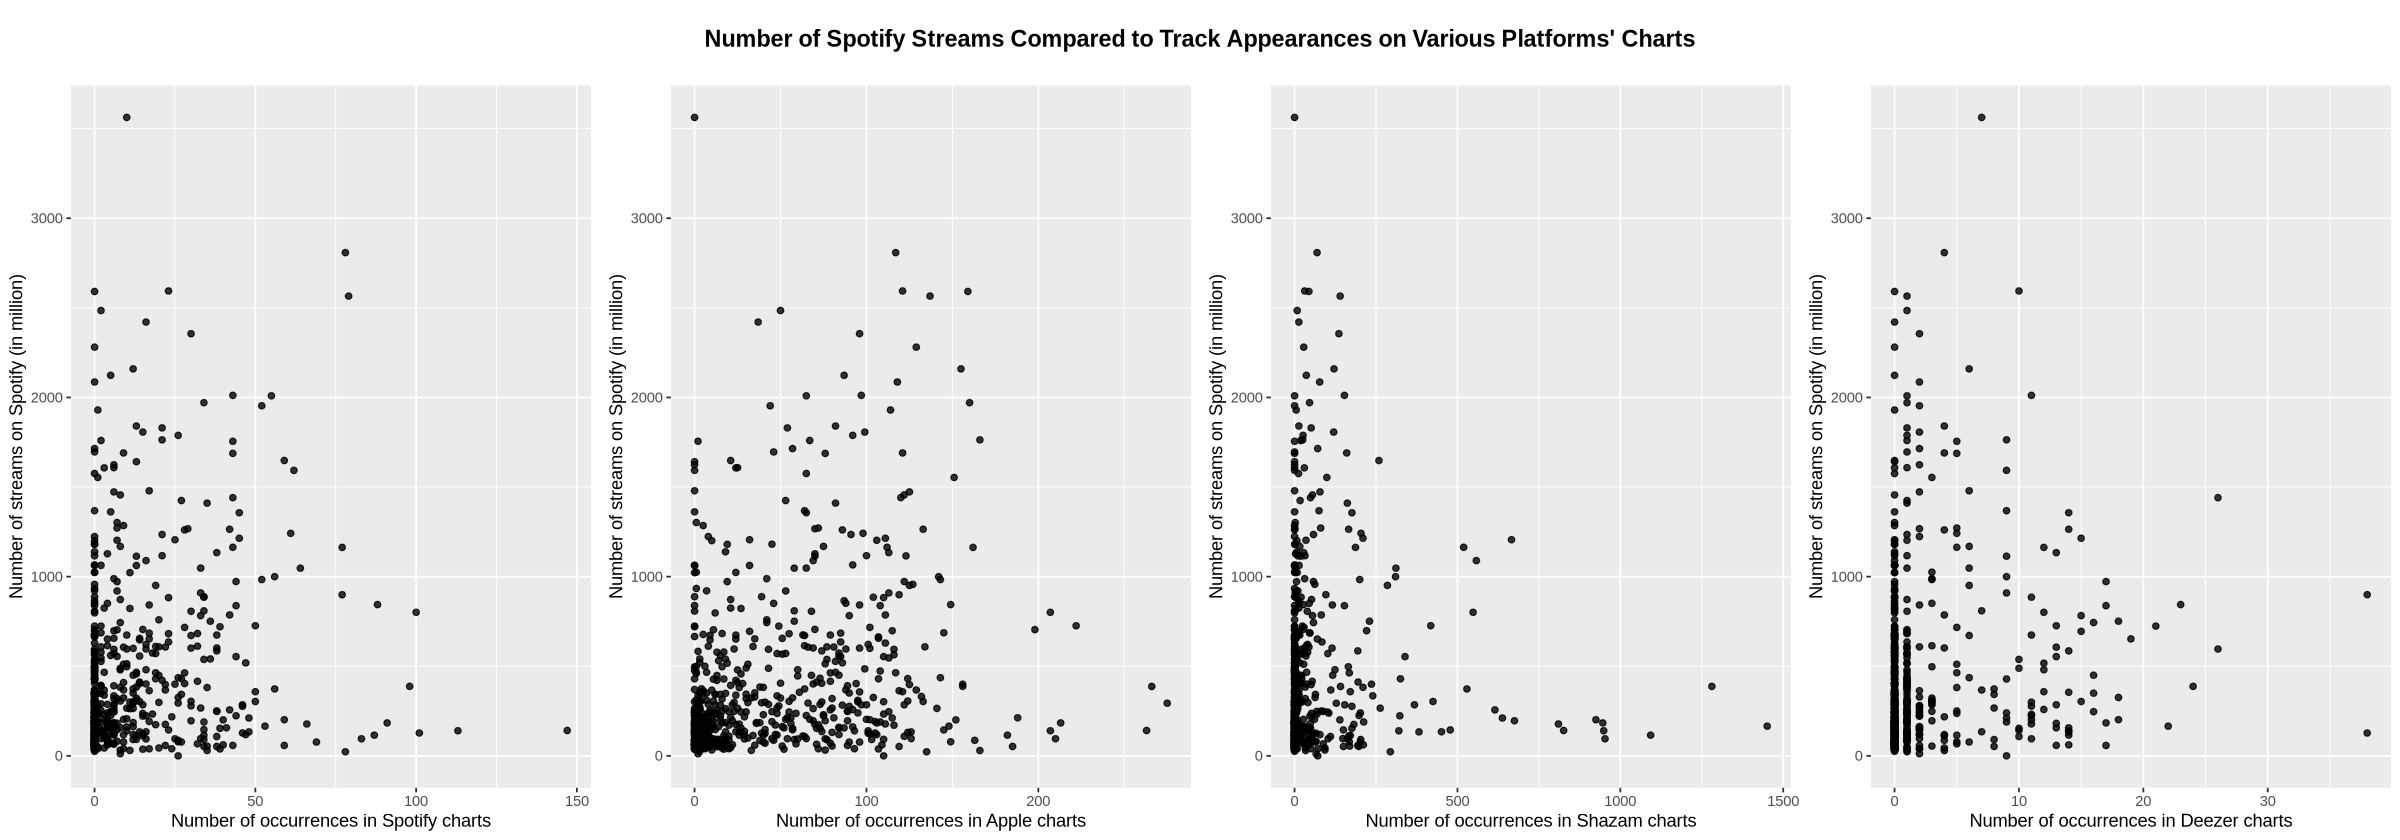

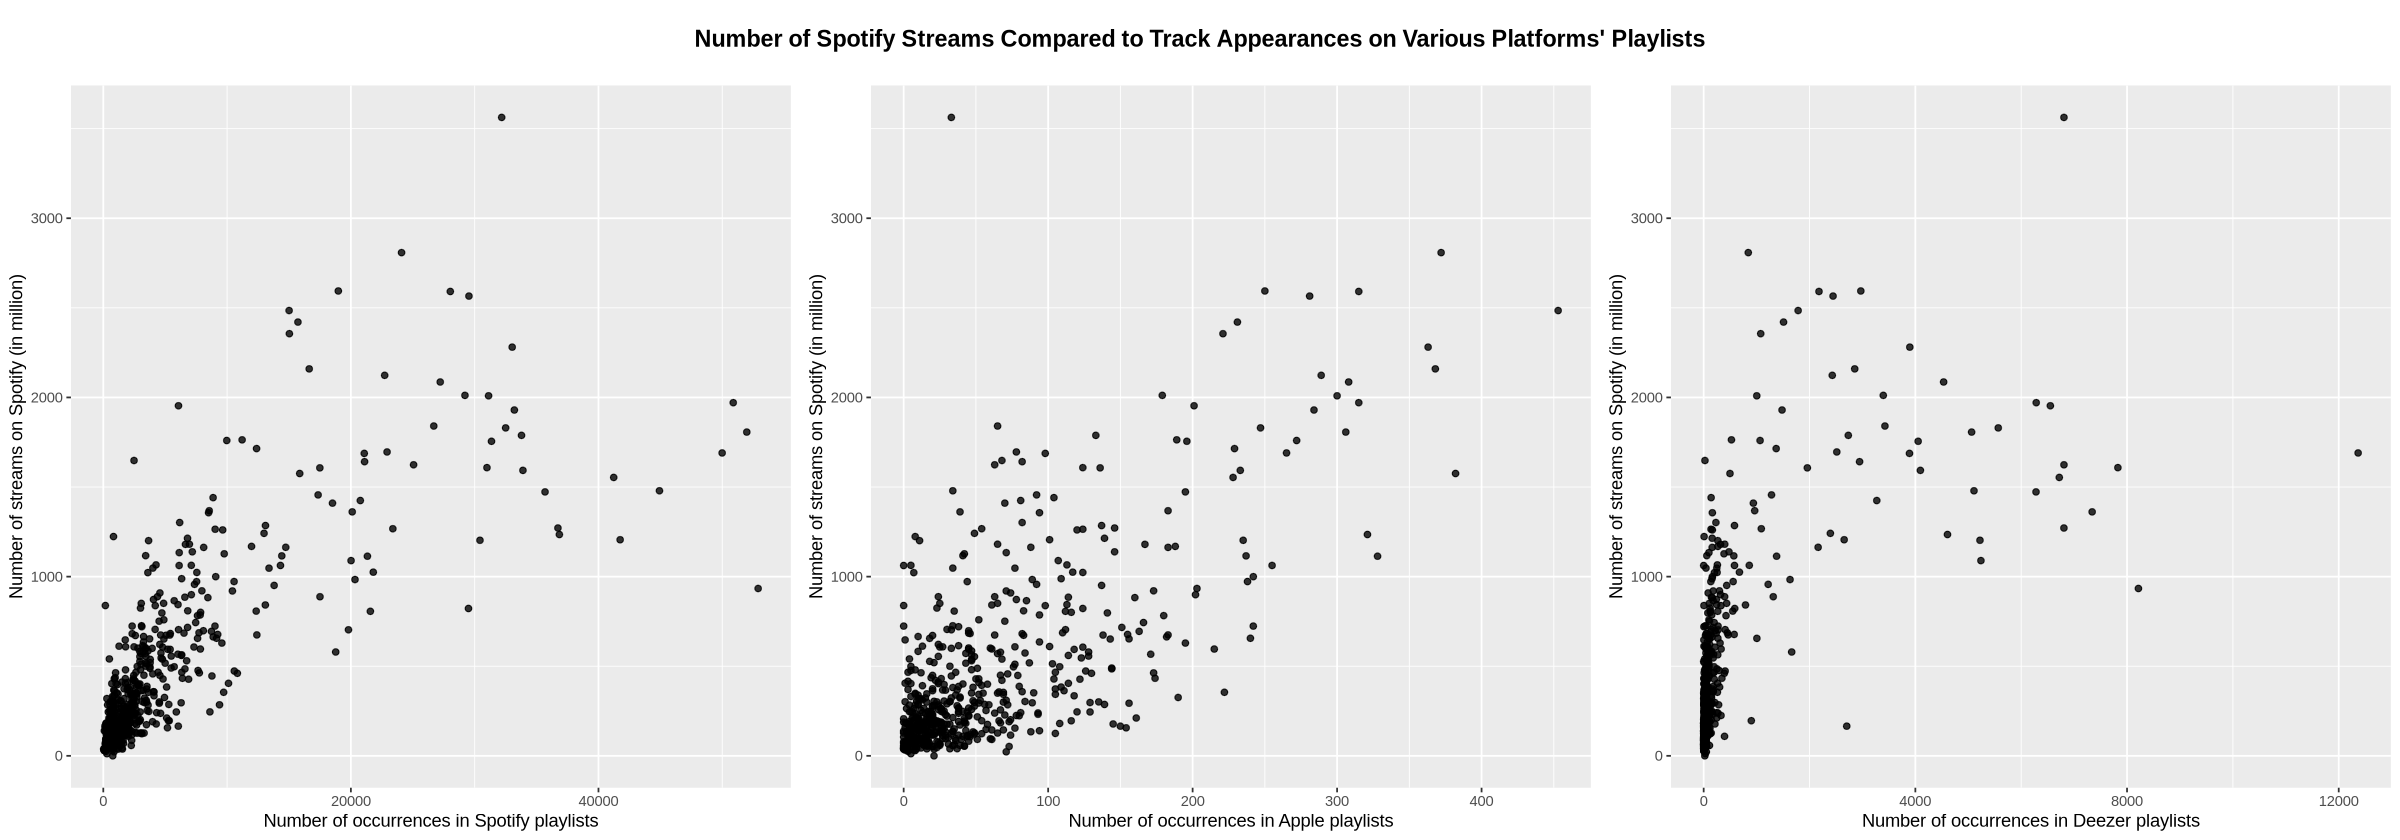

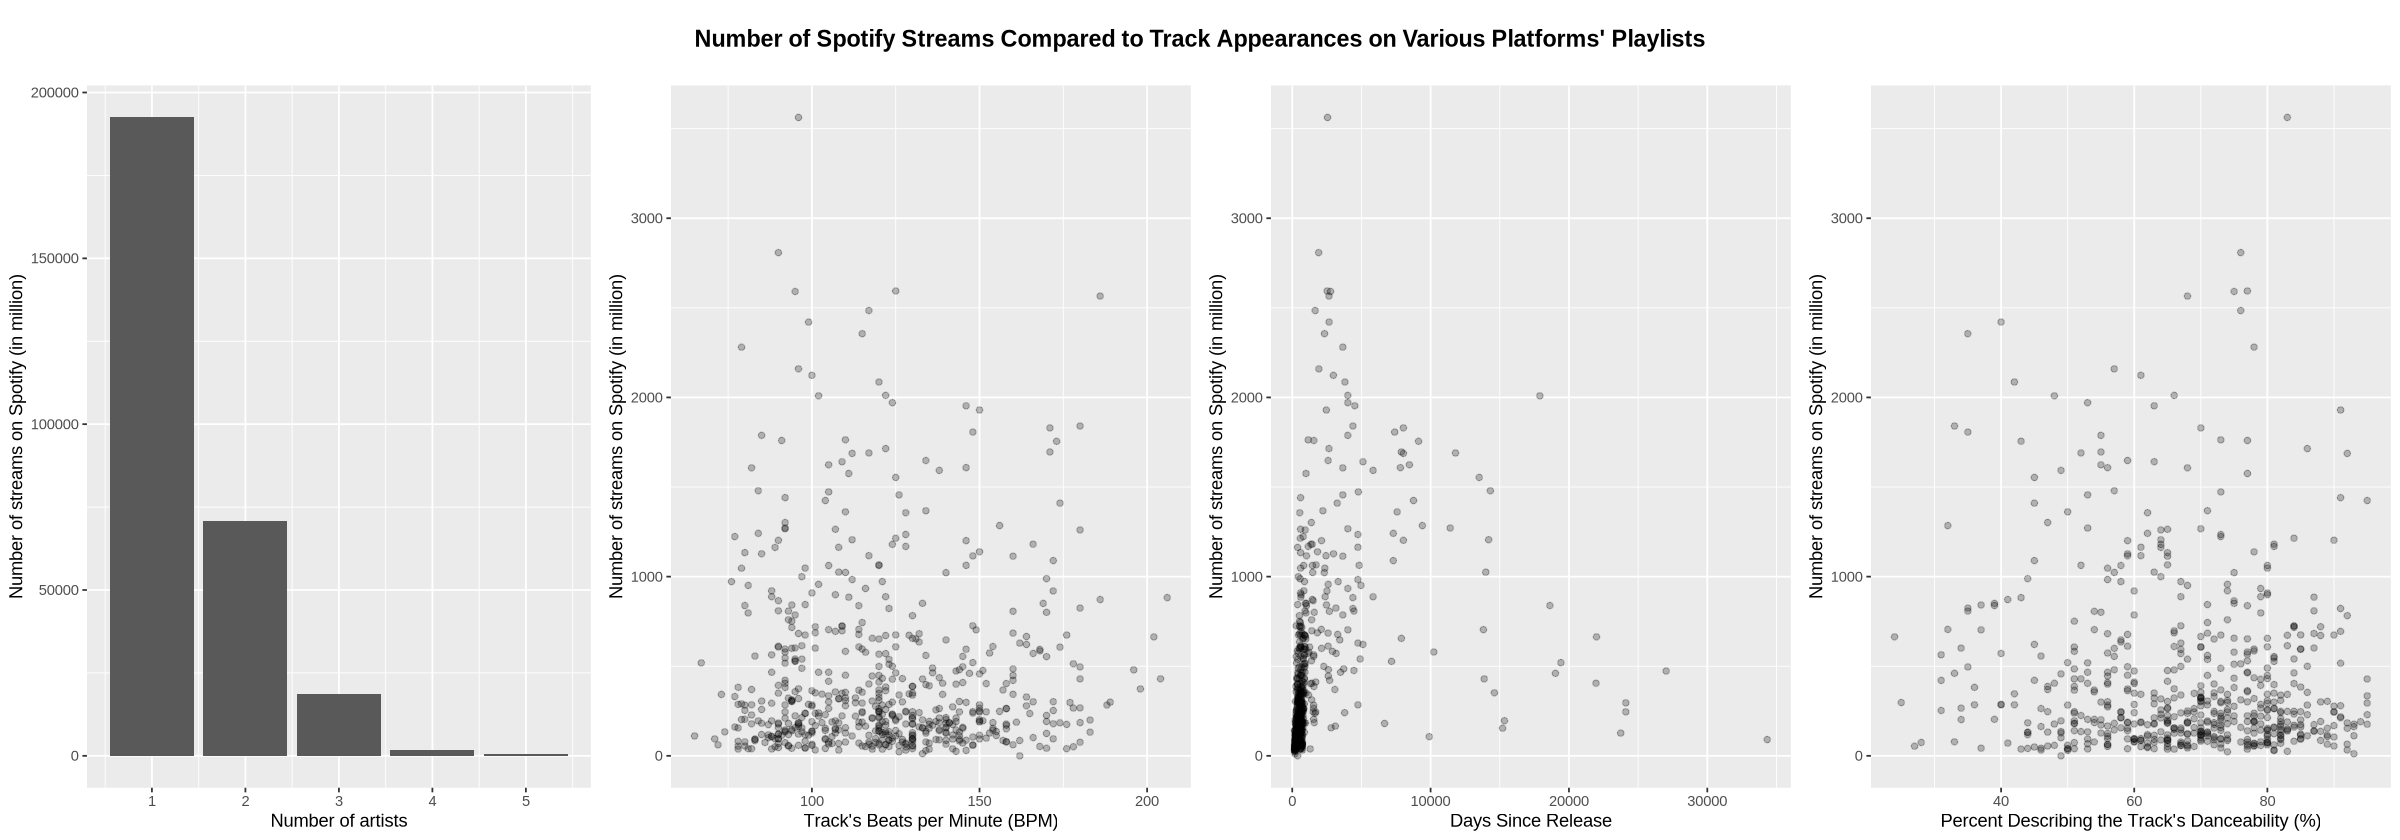

In [24]:
charts_plot
playlists_plot
track_plot

### Methods:

Upon conducting preliminary exploratory data analysis, the four following variables were selected as predictors to predict the number of streams:
- Danceability, to determine if people are more likely to enjoy songs that they can   directly engage with
- Valence, to determine whether people enjoy songs that are more musically            positive/happy in their daily life
- Bpm, to determine if people are more likely to enjoy faster songs
- Apple charts: This variable was selected to analyze whether this data is            applicable to a wider audience range, encompassing Apple listeners to see if        trends are true of other platforms in predicting the number of Spotify streams.
- Variables such as “instrumentalness”, “liveness”, and “speechiness” were not        included in our analysis as they had an uneven distribution of points, with an      overwhelming number of 0 values in the range of 0-100.

We will visualize the results by creating a scatter plot and its predicted regression line with one graph for each predictor. The y-axis will be the # of streams, and the x-axis will be the predictor. 


### Expected outcomes and significance:

Based on exploratory analysis and previous trends, we expect to find songs with moderately high bpm (90-150), high danceability, and moderately high valence percentages to show a correlation with increased Spotify streams

By finding trends in songs people enjoy and connect to, we can study the emotional and cultural effects of music on society and how it shapes mood, shifts perceptions, and sparks motivation and inspiration. Our findings can also help artists create popular songs and improve streaming services by helping streaming platforms recommend songs to users.

Further questions from the data analysis include:
- How do song lyrics impact the popularity of songs?
- Why do people generally enjoy faster songs?
- Which songs are appropriate and preferred for certain occasions such as parties,    sports, or casual listening?
- How might the musical attributes of the most streamed songs shift over time?
